<a id = "Introduction"></a>
# Introduction


# this project aims to implement:-
1) Convert colored image to grey scale image 

2) Preprocessing image

3) Perform SVD analysis

4) Develop model to perform Eigendecomposition and Singular Value Decomposition (SVD)

5) implement an Artificial Neural Network (ANN) 

6) discuss our experimental design 


In [16]:
#import all library used in the assignment 
import numpy as np
from skimage import color
from skimage.transform import rescale 
from matplotlib import image
import matplotlib.pyplot as plt
import glob
import os
from sklearn.model_selection import train_test_split
from numpy import linalg as LA #Linear Algebra
from sklearn.model_selection import train_test_split #Spliting data into training set and test set
from sklearn.metrics import mean_squared_error # Calculating the MSE with sklearn
# insert other library here

100
Got issue.
100
Got issue.
101
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10
Got issue.
10


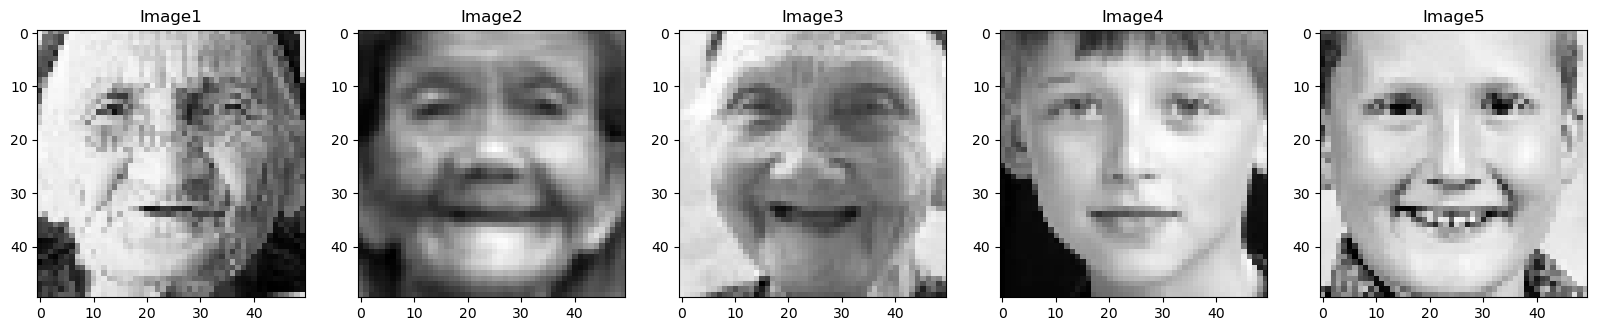

In [2]:
# set up two arrays to store the faces and the age of respective face image
Face = []
Age = []
Gender = []
Male = 0
Female = 0
T_data = 0
k = 0
_,ax = plt.subplots(1,5,figsize= (20, 4))

# show the image of the resized image
for i in glob.glob(r"C:\Users\User\Desktop\matrix analysis\Project Data\FaceData\*"):
    f_image = image.imread(i) #load 1 image from the FaceData Directory
    f_image = color.rgb2gray(f_image) #convert it from color to greyscale image
    f_image_rescale = rescale(f_image, 0.25, anti_aliasing = False)
    
    # times 0.25 cause initial image is 200x200
    
    Face.append(f_image_rescale.flatten()) 
    Age.append(int(os.path.basename(i).split("_")[0]))
    Gender.append(int(os.path.basename(i).split("_")[0]))
    T_data += 1 
    
    # show the first 5 faces images
    if k < 5:
        ax[k].imshow(f_image_rescale, cmap = 'gray')
        ax[k].set_title(f"Image{k+1}")
        k += 1

# Show number of male and female in the dataset
for j in range(len(Gender)):
    if Gender[j] == 0:
        Male += 1
    elif Gender[j] == 1:
        Female += 1
    else:
        print(Gender[j])
        print(f"Got issue.")
print(len(Gender))
print(Gender.index(3))
print(f"The number of data read from the file is", T_data)
print(f"Age of individuals present in the images ranges between {np.min(Age)} to {np.max(Age)}")
print(f"There is {Male} of Male present in the dataset and {Female} Female present in the dataset")

In [3]:
max_Age = np.max(Age) #get the biggest age in the dataset
D = np.array(Face).astype(float) #declare variable D as a float type
y = np.array(Age).astype(float)/max_Age # resize y into 0 ~ 1 

#double confirm the size of the dataset is correct
print(D.shape)
print(y.shape)

(9700, 2500)
(9700,)


In [4]:
# data preprocessing before model 
# split the data into 70% train, 30% test for now
# shuffling is banned to avoid the misplacement of the age and image
x_train, x_test, y_train, y_test = train_test_split(D, y, test_size = 0.3, shuffle = False)

print("After the separation of 70% train and 30% test: \nx_train has", x_train.shape, ", y_train has", y_train.shape, "\nx_test has", x_test.shape, ", y_test has", y_test.shape )

After the separation of 70% train and 30% test: 
x_train has (6790, 2500) , y_train has (6790,) 
x_test has (2910, 2500) , y_test has (2910,)


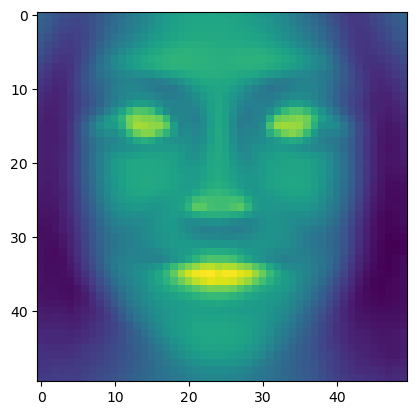

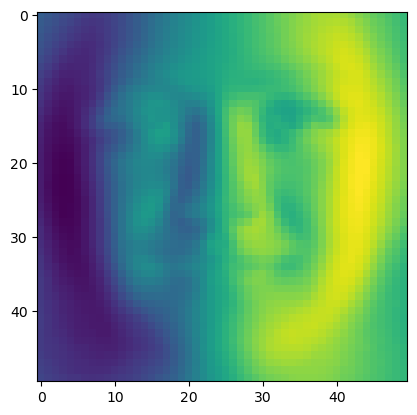

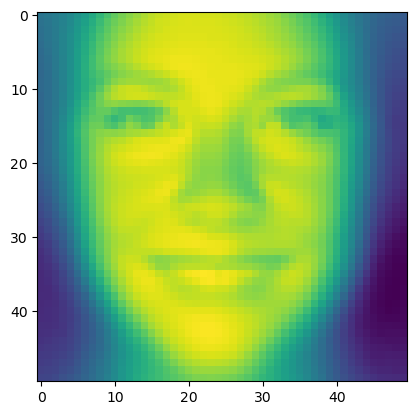

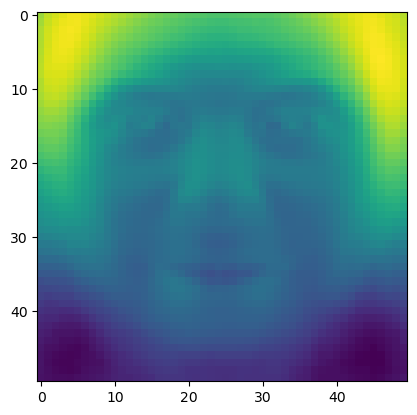

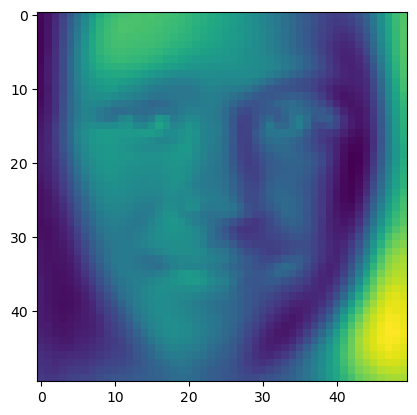

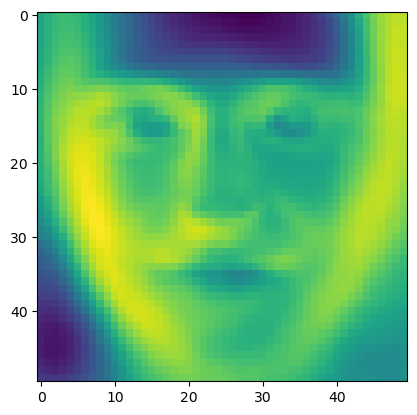

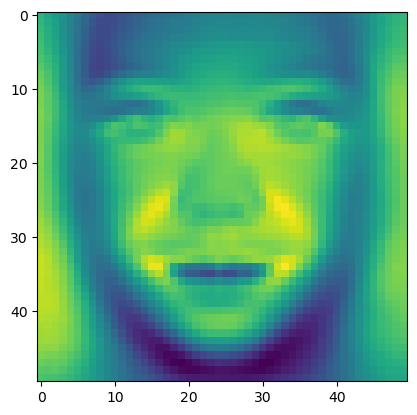

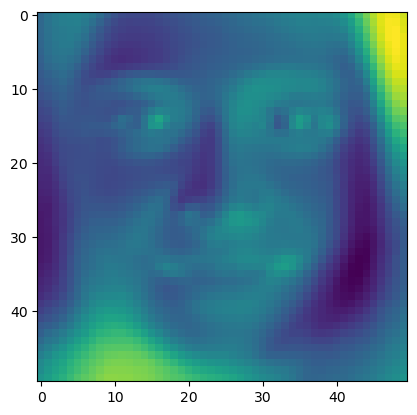

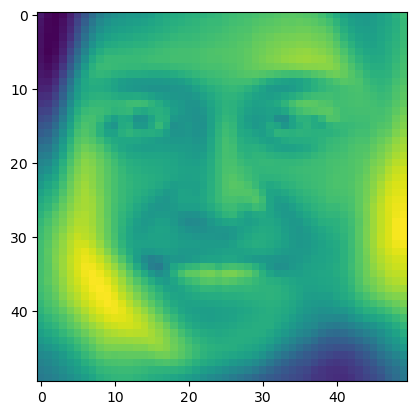

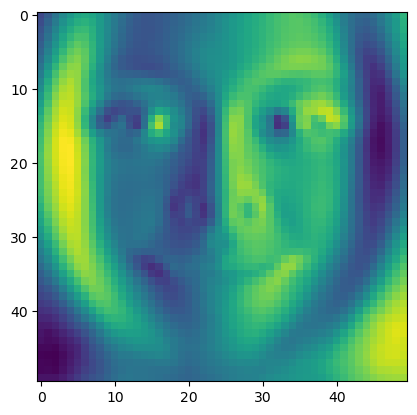

In [7]:
#Eigenfaces Analysis
data=np.abs(x_train) 
imgs = data/255-np.mean(data/255,axis=0)
C = np.cov(imgs.T) # Estimate a covariance matrix

#eigendecomposition
e_values, e_vectors = LA.eig(C)# Compute the eigenvalues and right eigenvectors 
E_Vectors = np.array([x for _,x in sorted(zip(e_values,e_vectors.T),reverse=True)]).T
for i in range(10): # display the first ten eigenfaces
 plt.figure() 
 plt.imshow(E_Vectors[:,i].reshape((50,50)))

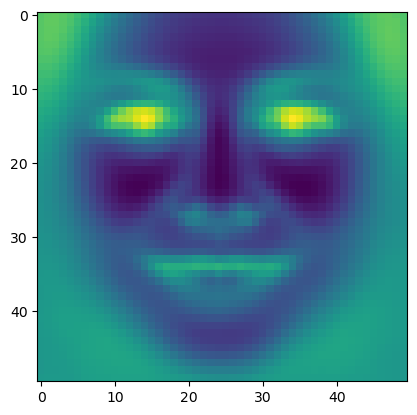

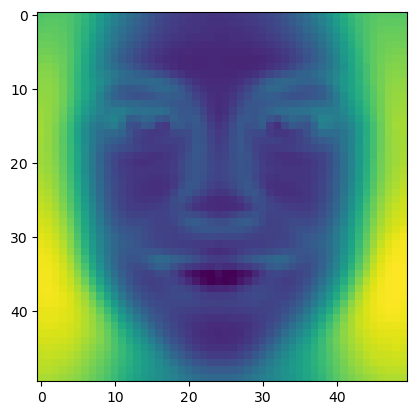

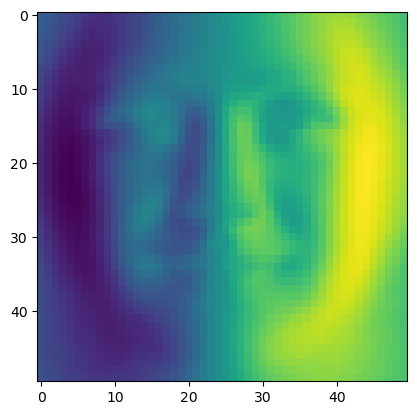

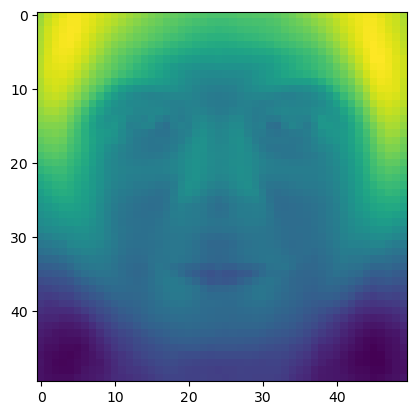

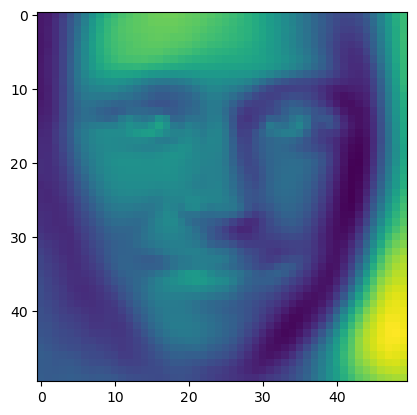

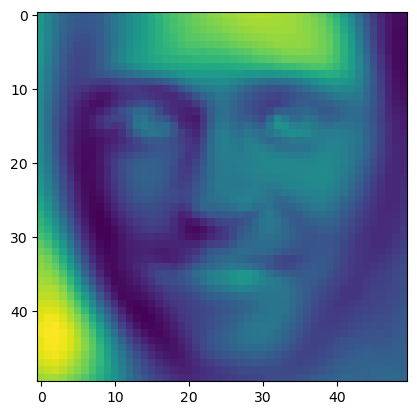

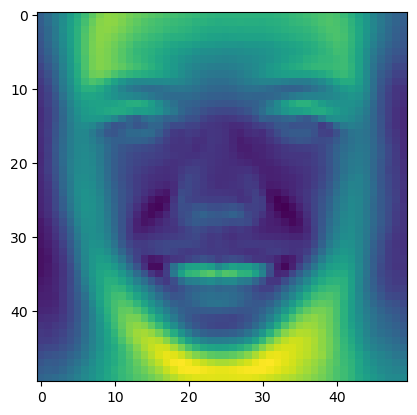

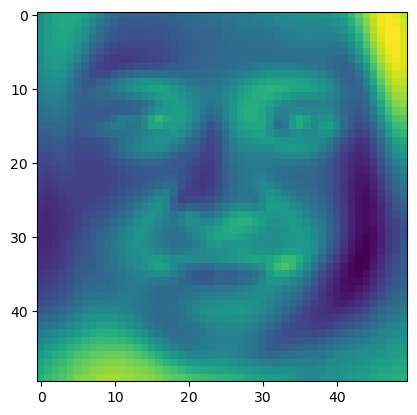

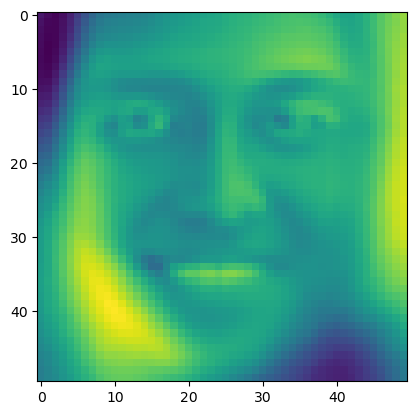

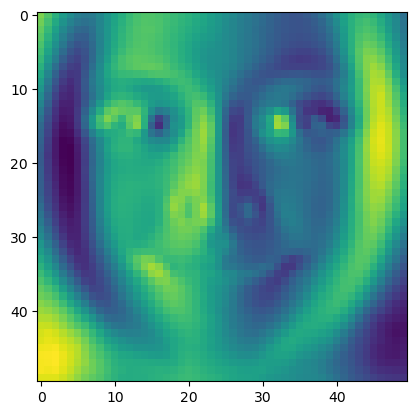

In [9]:
#SVD
U, S, V = LA.svd(x_train) 
# Reconstruction of the image
k = 50 #n_components

#matrix approximation 
mat_approx = U[:, :k]@ np.diag(S)[:k, :k] @ V[:k, :] #Left Singular Vectors: U, Singular Values: np.diag(S), Right Singular Vectors: V
for i in range(10): # display the first ten eigenfaces
 plt.figure() 
 plt.imshow(V.T[:,i].reshape((50,50)))

In [12]:
from time import time
# Compute the closed form W
Lambda = 50
D = np.hstack([np.ones((x_train.shape[0],1)),x_train]) 

DTD = np.matmul(D.T, D) #matrix multiplication

DTD_inv = np.linalg.inv(DTD + Lambda*np.eye(D.shape[1]))

DTD_inv_DT = np.matmul(DTD_inv,D.T)

W_c = np.matmul(DTD_inv_DT,y_train) 

start = time()
print( "Time taken", ((time() - start), "seconds\n")) 

Time taken (0.0010023117065429688, 'seconds\n')


In [20]:
y_pred = np.hstack([np.ones((x_train.shape[0],1)),x_train])@W_c #Predicted value
#Performance metric
mean_squared_error(y_train,y_pred) #MSE between predicted value and actual y value in training dataset

0.006582802122146385

In [23]:
y_pred = np.hstack([np.ones((x_test.shape[0],1)),x_test])@W_c
mean_squared_error(y_test,y_pred) #MSE between predicted value and actual y value in testing dataset

0.08859186604405413

In [24]:
# Nested loops -  test for all parameter possibilities

num_lambda = [50,100,150,200,300] # define possible lambda values

for i in num_lambda:

    Lambda = i
    
    D = np.hstack([np.ones((x_train.shape[0],1)),x_train])

    DTD = np.matmul(D.T, D)

    DTD_inv = np.linalg.inv(DTD + Lambda*np.eye(D.shape[1]))

    DTD_inv_DT = np.matmul(DTD_inv,D.T)

    W_c = np.matmul(DTD_inv_DT,y_train) 
    
    y_pred = np.hstack([np.ones((x_train.shape[0],1)),x_train])@W_c
    mse =mean_squared_error(y_train,y_pred)
    print("Lambda -",i,"=",mse)

Lambda - 50 = 0.006582802122146385
Lambda - 100 = 0.007182268216438966
Lambda - 150 = 0.00759387756486634
Lambda - 200 = 0.007916183621628457
Lambda - 300 = 0.008410796830895129


In [30]:
#perform SVD processed features
U, S, V = LA.svd(x_train.T)
k=100 #components
u = U[:,:k]
A = x_train@u # Process a new feature from train dataset
B = x_test@u  # Process a new feature from test dataset

In [35]:
#Perform linear regression again using SVD processed features
# Compute the closed form W
Lambda = 50

u = np.hstack([np.ones((A.shape[0],1)),A]) # Change X_train to A

uTu = np.matmul(u.T, u)

uTu_inv = np.linalg.inv(uTu + Lambda*np.eye(u.shape[1]))

uTu_inv_uT = np.matmul(uTu_inv,u.T)

W_c = np.matmul(uTu_inv_uT,y_train)

start = time()
print( "Time taken", ((time() - start), "seconds\n")) 

Time taken (0.0, 'seconds\n')


In [36]:
y_pred = np.hstack([np.ones((x_train.shape[0],1)),A])@W_c
mean_squared_error(y_train,y_pred)

0.008812732638970163

In [37]:
y_pred = np.hstack([np.ones((x_test.shape[0],1)),B])@W_c
mean_squared_error(y_test,y_pred)

0.09676004001301902

In [38]:
num_k = [20,50,100]
U, S, V = LA.svd(x_train.T)
for e in num_k:

    k=e
    u = U[:,:k]
    A = x_train@u
    B = x_test@u
    
    Lambda = 50
    
    u = np.hstack([np.ones((A.shape[0],1)),A])

    uTu = np.matmul(u.T, u)

    uTu_inv = np.linalg.inv(uTu + Lambda*np.eye(u.shape[1]))

    uTu_inv_uT = np.matmul(uTu_inv,u.T)

    W_c = np.matmul(uTu_inv_uT,y_train)   
    y_pred = np.hstack([np.ones((x_train.shape[0],1)),A])@W_c
    mse=mean_squared_error(y_train,y_pred)
    print("components -",e,"=",mse) # display mse for each k values

components - 20 = 0.011223617782376308
components - 50 = 0.009650702670947382
components - 100 = 0.008812732638970163
